In [287]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [288]:
data_file = r"D:\5.DataAnalysis\2\Project 2.. Hotel Booking Data Analysis-20230331T042954Z-001\Project 2.. Hotel Booking Data Analysis\hotel_bookings.csv"
hotel_df = pd.read_csv(data_file)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [289]:
#checking for nan data
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [290]:
#fill the null data with zeros
hotel_df.fillna(0,inplace=True)

In [291]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [292]:
hotel_df.shape

(119390, 32)

In [293]:
#check if there is zeros in adults,childern and babis 
hotel_df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [294]:
hotel_df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [295]:
hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [296]:
#It's not possible for all of them to be zero at the same time, thus we need to fix this if its in the data
filter_family =(hotel_df['adults']==0) & (hotel_df['babies']==0) & (hotel_df['children'] ==0)
hotel_df[filter_family]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [297]:
#Using all the data other than hotel_df[filter_family]
hotel_df[-filter_family]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [298]:
df_hotel=hotel_df[-filter_family]

## 1- Using a spatial analysis, where do the visitors come from? (for each hotel)

In [299]:
#first we need to make sure if there is any cancelled bookings
hotel_df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [300]:
#Removing all the ccancelled bookings
filter_not_cancelled=(hotel_df['is_canceled']==0)
hotel_df[filter_not_cancelled]
hotel_df_active = hotel_df[filter_not_cancelled]
hotel_df_active

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [301]:
hotel_df_active['is_canceled'].unique()

array([0], dtype=int64)

In [302]:
#See how many hotel we have
hotel_df_active['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [303]:
#Create two different df for each hotel
rh_df = hotel_df_active[(hotel_df_active['hotel']=='Resort Hotel')]
ch_df = hotel_df_active[(hotel_df_active['hotel']=='City Hotel')]

In [304]:
rh_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [305]:
ch_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [306]:
#Examine the country coloumn
hotel_df_active['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 0, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'JAM', 'HRV', 'IRN', 'CAF', 'CYP', 'NZL', 'IDN',
       'KAZ', 'THA', 'COL', 'DOM', 'MKD', 'MYS', 'NGA', 'VEN', 'GIB',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'PHL', 'SGP', 'BDI', 'URY',
       'SAU', 'KWT', 'LBN', 'AND', 'VNM', 'AZE', 'PLW', 'ARE', 'QAT',
       'EGY', 'PER', 'SVK', 'MDV', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'PAK', 'MAC', 'TGO', 'TWN', 'HKG', 'DJI',
       'GEO', 'TUN', 'STP', 'SEN', 'KNA', 'ETH', 'IRQ', 'RWA', 'LIE',
       'MMR', 'PAN

In [307]:
#Group by the country for each hotel df , starting with Resort Hotel
rh_df.groupby(['country']).size().reset_index(name='no of Resort Hotel guests')
countries_rh= rh_df.groupby(['country']).size().reset_index(name='no of Resort Hotel guests').sort_values('no of Resort Hotel guests', ascending=False)
countries_rh

,country,no of Resort Hotel guests
92,PRT,10192
44,GBR,5923
40,ESP,3106
53,IRL,1734
43,FRA,1400
...,...,...
69,MAC,1
96,SAU,1
39,EGY,1
48,HKG,1


In [308]:
ch_df.groupby(['country']).size().reset_index(name='no of City Hotel guests')
countries_ch= ch_df.groupby(['country']).size().reset_index(name='no of City Hotel guests').sort_values('no of City Hotel guests', ascending=False)
countries_ch

,country,no of City Hotel guests
114,PRT,10879
49,FRA,7081
38,DEU,5012
52,GBR,3753
45,ESP,3285
...,...,...
95,MMR,1
116,PYF,1
98,MRT,1
101,NAM,1


In [309]:
#To find the top 10 countries that visit the hotels
countries_rh.nlargest(10 , 'no of Resort Hotel guests' )

,country,no of Resort Hotel guests
92,PRT,10192
44,GBR,5923
40,ESP,3106
53,IRL,1734
43,FRA,1400
33,DEU,1057
24,CN,614
81,NLD,458
0,0,419
112,USA,407


In [310]:
 countries_ch.nlargest(10 , 'no of City Hotel guests' )

,country,no of City Hotel guests
114,PRT,10879
49,FRA,7081
38,DEU,5012
52,GBR,3753
45,ESP,3285
69,ITA,2054
14,BEL,1479
104,NLD,1259
146,USA,1189
22,BRA,1065


In [ ]:
#For better representation, we can use plotly as following
px.choropleth(data_frame=countries_rh , locations ='country', color='no of Resort Hotel guests',hover_name='country',title='Home Country of Guests for Resort Hotel')

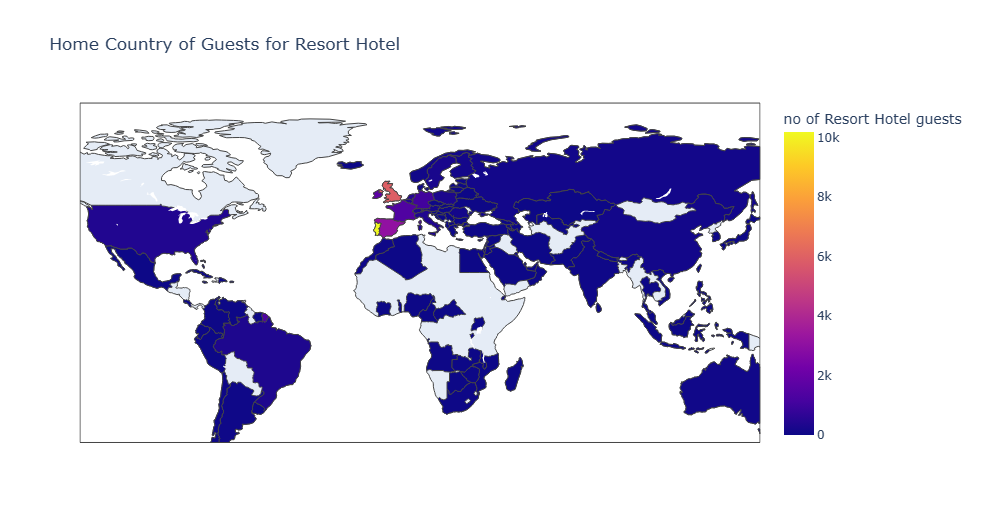

In [ ]:
px.choropleth(data_frame=countries_ch , locations ='country', color='no of City Hotel guests',hover_name='country',title='Home Country of Guests for City Hotel')

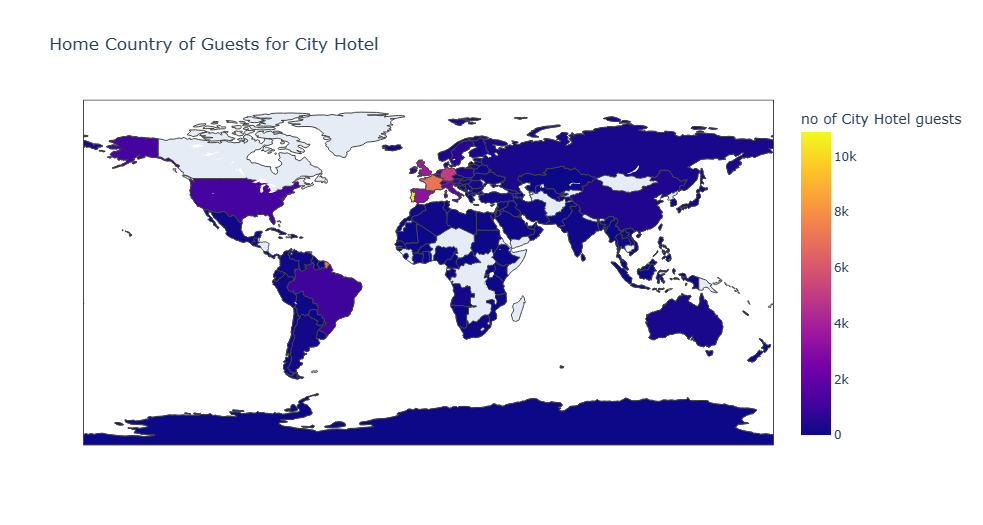

## 2- How much do visitors spend per night at each hotel for various room types?

In [313]:
#The Price column is named 'adr' , its better to change it to just 'price'
hotel_df_active= hotel_df_active.rename(columns={'adr': 'price'})
rh_df=rh_df.rename(columns={'adr': 'price'})
ch_df=ch_df.rename(columns={'adr': 'price'})

In [314]:
#Checking the rooms type
hotel_df_active['reserved_room_type'].unique()

array(['C', 'A', 'D', 'G', 'E', 'F', 'H', 'L', 'B'], dtype=object)

In [ ]:
#We can plot a box chart using px or sns like this
px.box(x='reserved_room_type', y='price', color='hotel', data_frame=hotel_df_active , title='Price per night stats')

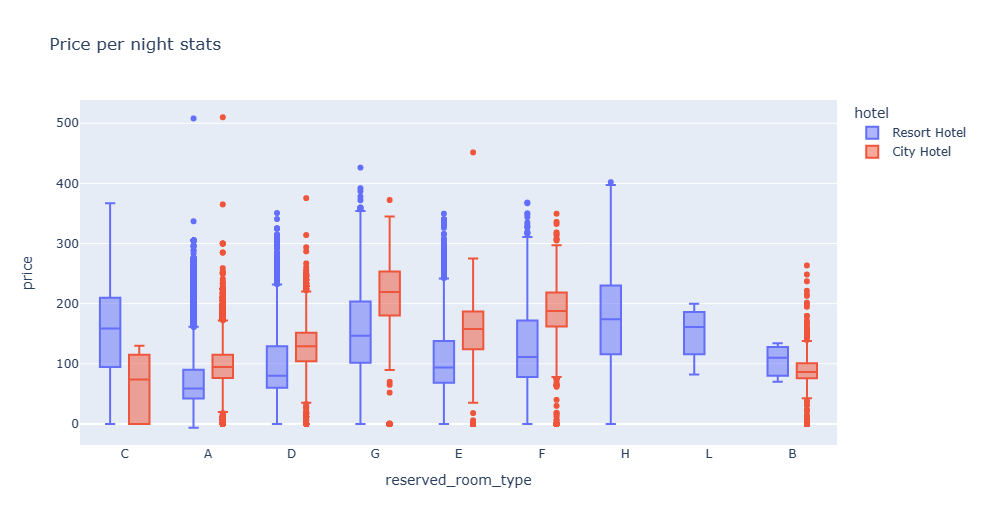

## 3- How does each hotel's yearly average price change?

In [316]:
#Checking the monthly data
hotel_df_active['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [317]:
#We can group each month and calcaute the mean price for that month for each hotel
rh_df.groupby('arrival_date_month')['price'].mean().reset_index(name='Average Price')


,arrival_date_month,Average Price
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [318]:
ch_df.groupby('arrival_date_month')['price'].mean().reset_index(name='Average Price')

,arrival_date_month,Average Price
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [319]:
#Merge the two df
ch_df.groupby('arrival_date_month')['price'].mean().reset_index(name='Average Price').merge(rh_df.groupby('arrival_date_month')['price'].mean().reset_index(name='Average Price')
, on ='arrival_date_month')
monthly_avg_prices = ch_df.groupby('arrival_date_month')['price'].mean().reset_index(name='Average Price').merge(rh_df.groupby('arrival_date_month')['price'].mean().reset_index(name='Average Price')
, on ='arrival_date_month')
monthly_avg_prices.rename(columns={'arrival_date_month' : 'Month','Average Price_x': 'Average Price City Hotel', 'Average Price_y': 'Average Price Resort Hotel'}, inplace=True)
monthly_avg_prices

,Month,Average Price City Hotel,Average Price Resort Hotel
0,April,111.856824,75.867816
1,August,118.412083,181.205892
2,December,87.856764,68.322236
3,February,86.183025,54.147478
4,January,82.160634,48.708919
5,July,115.563810,150.122528
6,June,117.702075,107.921869
7,March,90.170722,57.012487
8,May,120.445842,76.657558
9,November,86.500456,48.681640


In [320]:
#Everything is ok but the Months are not ordered,we can order it using pd.Categorical for example
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
cat_type= pd.Categorical(monthly_avg_prices['Month'], categories=ordered_months, ordered=True)
monthly_avg_prices['Month'] = monthly_avg_prices['Month'].astype(cat_type)
monthly_avg_prices = monthly_avg_prices.sort_values('Month')

monthly_avg_prices 

,Month,Average Price City Hotel,Average Price Resort Hotel
4,January,82.160634,48.708919
3,February,86.183025,54.147478
7,March,90.170722,57.012487
0,April,111.856824,75.867816
8,May,120.445842,76.657558
6,June,117.702075,107.921869
5,July,115.563810,150.122528
1,August,118.412083,181.205892
11,September,112.598452,96.416860
10,October,101.745956,61.727505


In [ ]:
#Plotting the Month vs both prices using px or anyother plotting lib
plt.figure(figsize=(14,8))
fig = px.line(monthly_avg_prices, x='Month', y=['Average Price City Hotel', 'Average Price Resort Hotel'], title='Hotel Prices per Month')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Average Price (EUR)')
fig.show()

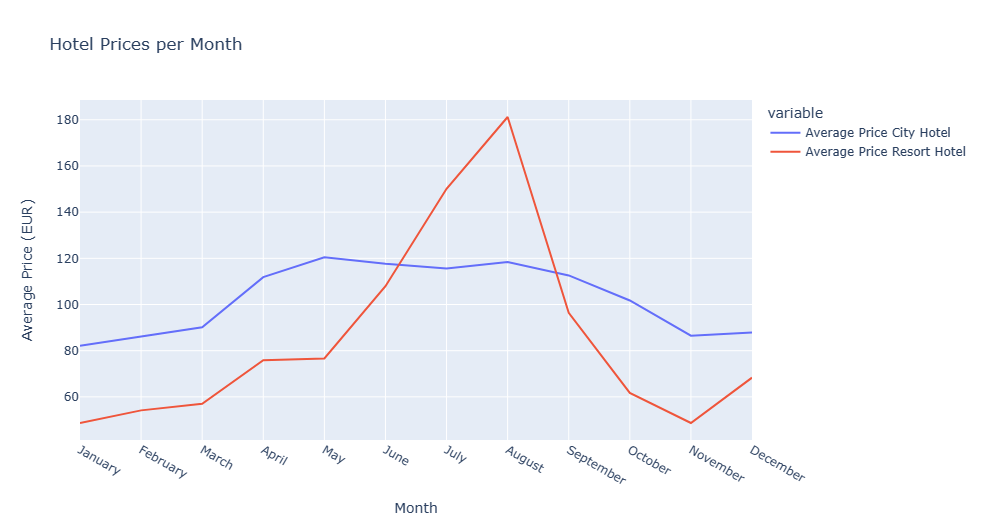

## 4- Analyse the bookings by market segments 

In [322]:
hotel_df_active['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [ ]:
hotel_df_active.groupby('market_segment').size().reset_index(name='count')
segments=hotel_df_active.groupby('market_segment').size().reset_index(name='count')
plt.figure(figsize=(14,8))
px.pie(segments,names='market_segment',values='count' ,title='Booking per market segment')

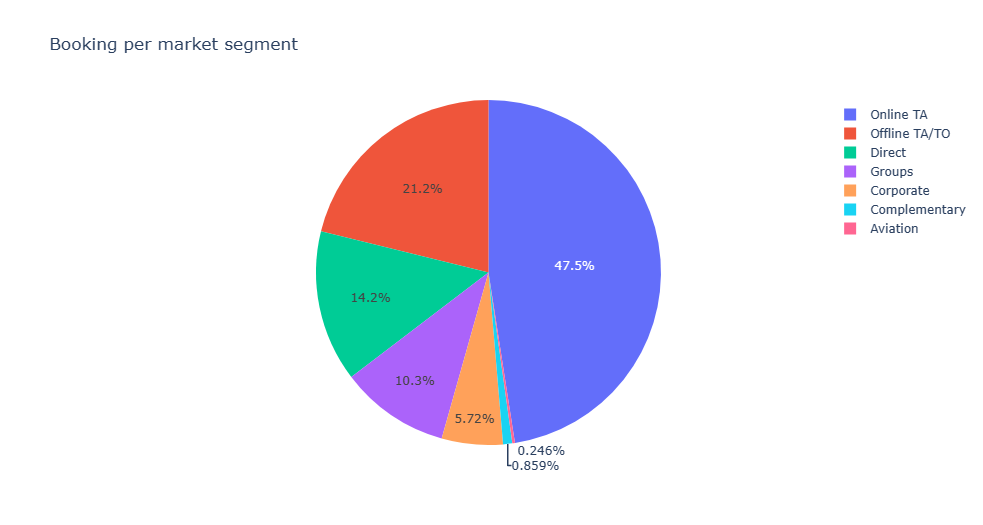

## 5 -Distribution of Hotel Nights Spent by Market Segment, for Different Hotels

In [324]:
hotel_df_active

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,price,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [325]:
#Creat new col fo the nights spent in both week and weekends
hotel_df_active['nights_spent'] = hotel_df_active['stays_in_weekend_nights'] + hotel_df_active['stays_in_week_nights']

In [ ]:
px.box(data_frame=hotel_df_active , x='market_segment' , y='nights_spent', color= 'hotel')

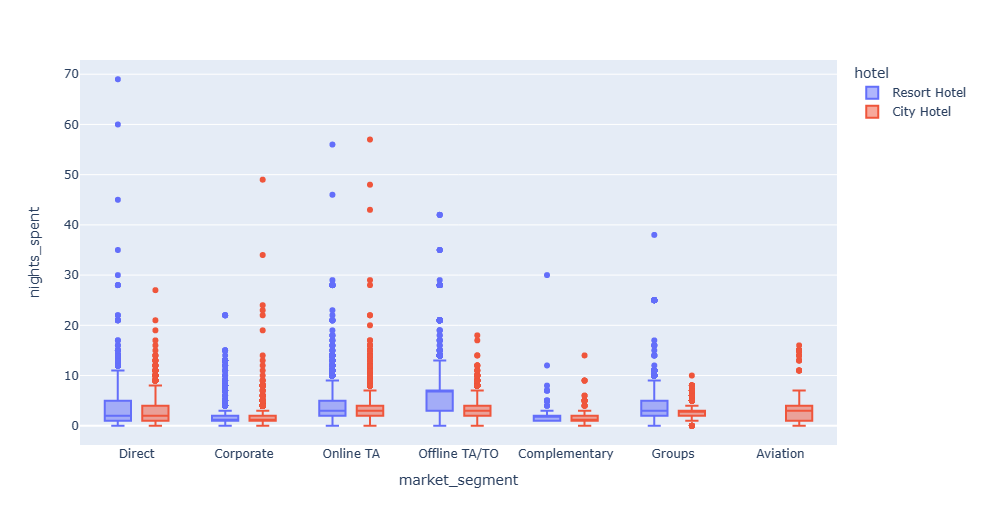

## 6-What meal do the guests prefer?

In [327]:
#Explore the meal column
hotel_df_active['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [328]:
#Group by the meal and fine the count
hotel_df_active.groupby('meal').size().reset_index(name='count')

,meal,count
0,BB,57800
1,FB,320
2,HB,9479
3,SC,6684
4,Undefined,883


In [ ]:
#Represnt the data as pie chart
px.pie(data_frame=hotel_df_active.groupby('meal').size().reset_index(name='count'), names='meal' , values ='count' ,
       hole = 0.5 , title='Prefered Meals for the guests for all hotels')

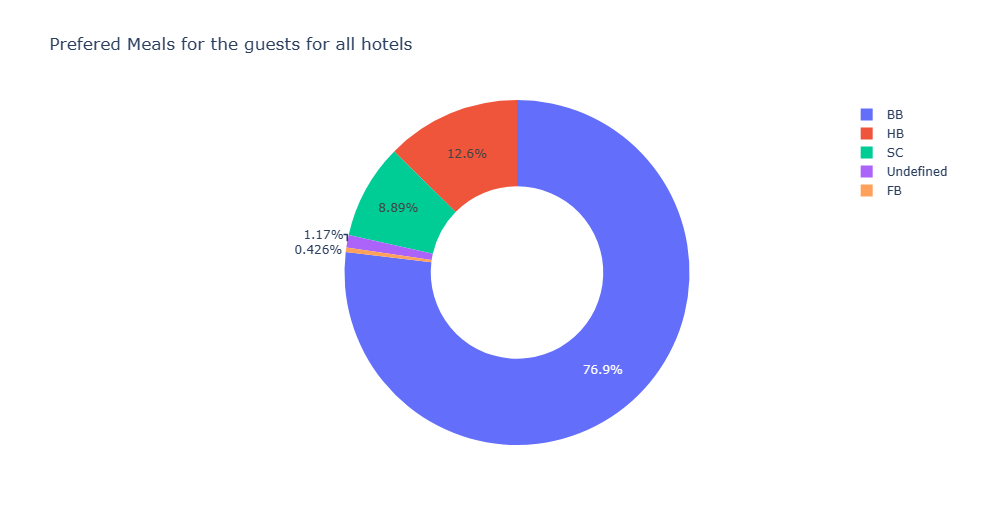

## 7- Analyze the relation between thte special requests and cancellation of booking

In [330]:
hotel_df_active['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [331]:
#To examine the cancellation we need to get to the first df we create hotel_df
hotel_df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [332]:
hotel_df_cancelled=hotel_df[(hotel_df['is_canceled']==1)]

In [333]:
hotel_df_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,No Deposit,9.0,0.0,0,Transient,0.0,0,3,Canceled,4/25/2017
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,Canceled,6/5/2017
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,Canceled,5/31/2017
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,No-Show,7/17/2017


In [334]:
hotel_df_cancelled['total_of_special_requests'].unique()

array([1, 0, 2, 3, 4, 5], dtype=int64)

In [335]:
#Group by the total_of_special_requests and the count of the cancellations
hotel_df_cancelled.groupby(['total_of_special_requests'])['is_canceled'].size().reset_index(name= 'Number of cancellation')
requests_and_cancellations=hotel_df_cancelled.groupby(['total_of_special_requests'])['is_canceled'].size().reset_index(name= 'Number of cancellation')
requests_and_cancellations

,total_of_special_requests,Number of cancellation
0,0,33556
1,1,7318
2,2,2866
3,3,446
4,4,36
5,5,2


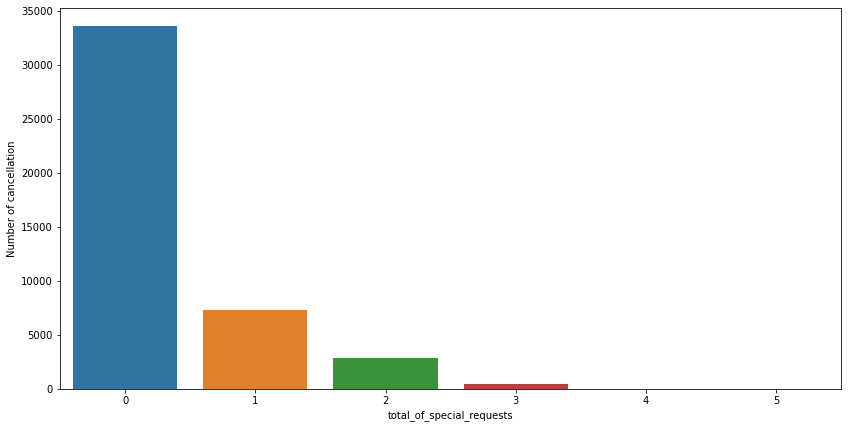

In [336]:
plt.figure(figsize=(14,7))
sns.barplot(x='total_of_special_requests',y='Number of cancellation', data=hotel_df_cancelled.groupby(['total_of_special_requests'])['is_canceled'].size().reset_index(name= 'Number of cancellation'))

## 8 - Which months have the highest number of visitors? (for each hotel)

In [337]:
#Group by the months count
monthly_visit_ch=ch_df.groupby('arrival_date_month').size().reset_index(name='Number of guest for City Hotel')
monthly_visit_ch =monthly_visit_ch.rename(columns={'arrival_date_month': 'Month'})
monthly_visit_ch

,Month,Number of guest for City Hotel
0,April,4015
1,August,5381
2,December,2392
3,February,3064
4,January,2254
5,July,4782
6,June,4366
7,March,4072
8,May,4579
9,November,2696


In [338]:
monthly_visit_rh=rh_df.groupby('arrival_date_month').size().reset_index(name='Number of guest for Resort Hotel')
monthly_visit_rh =monthly_visit_rh.rename(columns={'arrival_date_month': 'Month'})
monthly_visit_rh

,Month,Number of guest for Resort Hotel
0,April,2550
1,August,3257
2,December,2017
3,February,2308
4,January,1868
5,July,3137
6,June,2038
7,March,2573
8,May,2535
9,November,1976


In [339]:
#Merging the two dfs and order the months
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
cat_type= pd.Categorical(monthly_visit_ch['Month'], categories=ordered_months, ordered=True)
monthly_visit_ch['Month'] = monthly_visit_ch['Month'].astype(cat_type)
monthly_visit_rh['Month'] = monthly_visit_rh['Month'].astype(cat_type)
monthly_visit_ch = monthly_visit_ch.sort_values('Month')
monthly_visit_rh = monthly_visit_rh.sort_values('Month')
monthly_visit= monthly_visit_ch.merge(monthly_visit_rh , on='Month')
monthly_visit.rename(columns ={'Number of guest for City Hotel_x':' Number of guest for City Hotel' ,'Number of guest for City Hotel_y' : 'Number of guest for City Hotel'} ,inplace=True)
monthly_visit

,Month,Number of guest for City Hotel,Number of guest for Resort Hotel
0,January,2254,1868
1,February,3064,2308
2,March,4072,2573
3,April,4015,2550
4,May,4579,2535
5,June,4366,2038
6,July,4782,3137
7,August,5381,3257
8,September,4290,2102
9,October,4337,2577


In [ ]:
px.line(data_frame=monthly_visit, x='Month',
        y=['Number of guest for City Hotel', 'Number of guest for Resort Hotel'], title='Monthly Visitors')

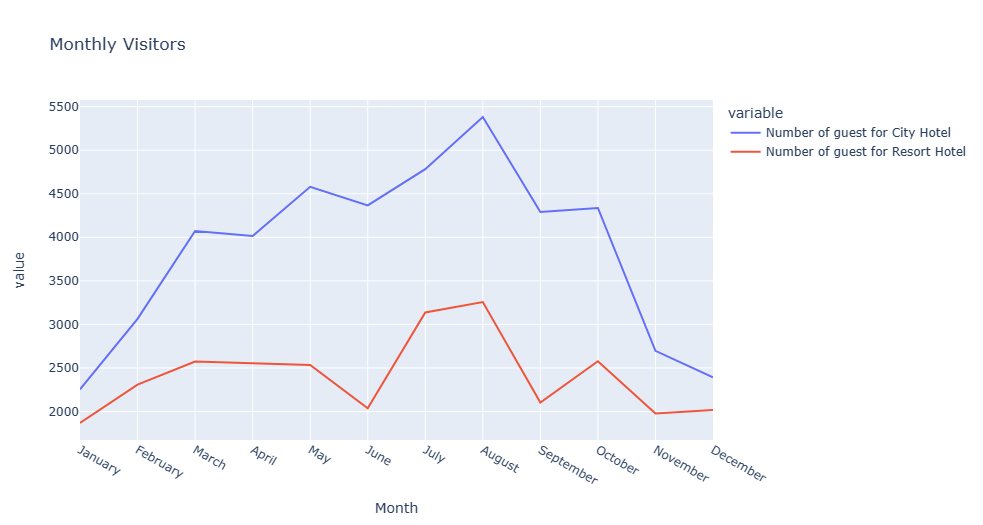

## 9- Which hotel has more cancellations?

In [341]:
hotel_df_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,No Deposit,9.0,0.0,0,Transient,0.0,0,3,Canceled,4/25/2017
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,Canceled,6/5/2017
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,Canceled,5/31/2017
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,0.0,238.0,0,Transient,65.0,0,0,No-Show,7/17/2017


In [342]:
hotel_df_cancelled.groupby('hotel')['is_canceled'].size().reset_index(name='Number of Cancellations')
hotel_cancel=hotel_df_cancelled.groupby('hotel')['is_canceled'].size().reset_index(name='Number of Cancellations')
hotel_cancel

,hotel,Number of Cancellations
0,City Hotel,33102
1,Resort Hotel,11122


In [ ]:
px.pie(data_frame=hotel_cancel , names='hotel',values='Number of Cancellations' , title ='Cancellations per hotel')

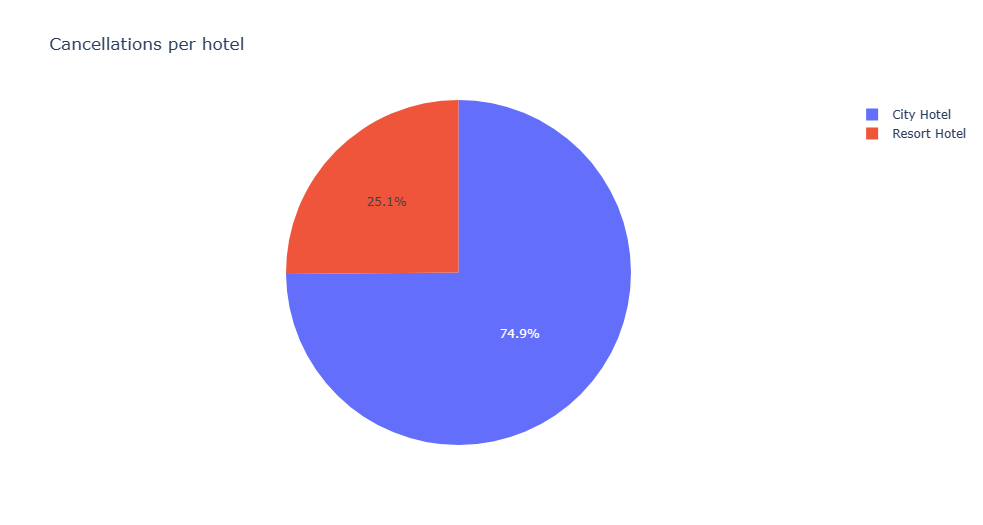

## 9- Which month has the higest cancellations?

In [ ]:
hotel_df_cancelled.groupby('arrival_date_month').size().reset_index(name='Number of Cancellations')
month_cancel=month_cancel.rename(columns={'arrival_date_month': 'Month', 'count': 'Cancellations'})
px.pie(data_frame=month_cancel , names='Month',values='Number of Cancellations' , title ='Cancellations per month')

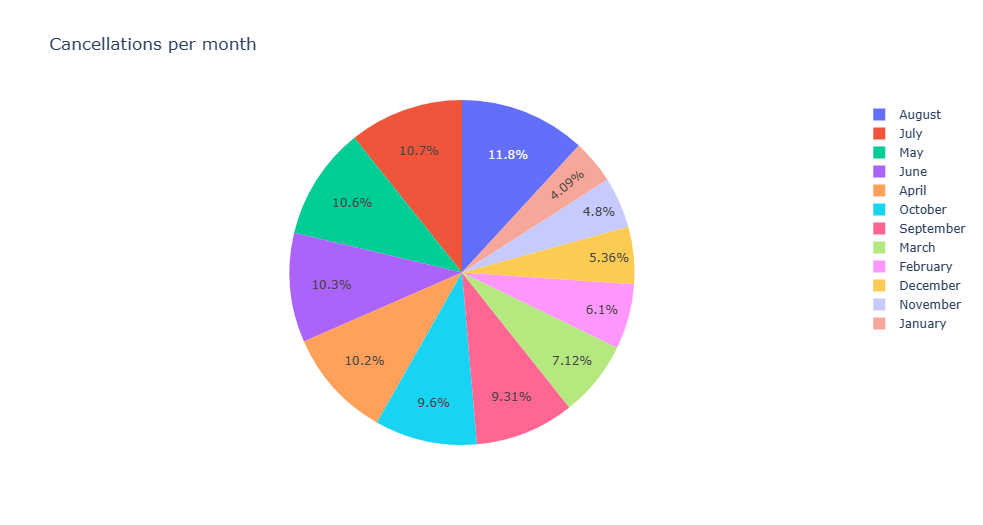